## Create a model for interest rate prediction using Logistic Regression

In [50]:
import pandas as pd
from pymongo import MongoClient
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor
import pickle


client = MongoClient("mongodb://localhost:27017/")
db = client["p2p_lending"]

data_set = db["original"]

data1 = list(data_set.find())
data = pd.DataFrame(data1)

selected_features = ['grade', 'sub_grade']
target_variable = 'interest_rate'

filtered_data = data[selected_features + [target_variable]]

filtered_data = filtered_data.dropna()

# Encode categorical features using label encoders
label_encoders = {}
for column in ['grade', 'sub_grade']:
    le = LabelEncoder()
    filtered_data[column] = le.fit_transform(filtered_data[column])
    label_encoders[column] = le

# Define features and target variable for the model
X = filtered_data[selected_features]
y = filtered_data[target_variable]

In [51]:
# Split the data into training and testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

# Make predictions using test set 
y_pred = model.predict(X_test)

# Display the performance metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error (MSE):", mse)
print("R Squared Score :",r2)


Mean Squared Error (MSE): 0.2139354148168502
R Squared Score : 0.9913870612200697


In [52]:
print(performance_df)

               Model       MSE  Accuracy (%)
0  Linear Regression  0.518697     97.911749
1      Random Forest  0.213906     99.138823


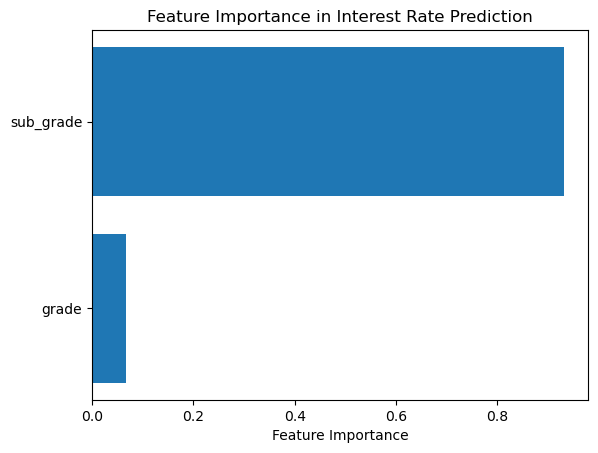

In [53]:
# Display the feature importance of the model using a horizontal bar graph
feature_importances = model.feature_importances_
plt.barh(X.columns, feature_importances)
plt.xlabel("Feature Importance")
plt.title("Feature Importance in Interest Rate Prediction")
plt.show()

In [54]:
# Save the logistic regression model
model_filename = 'interest_model.pkl'
with open(model_filename, 'wb') as file:
    pickle.dump(model, file)
with open('interest_label_encoders.pkl', 'wb') as f:
    pickle.dump(label_encoders, f)
print("Encoders saved successfully!")
print(f"Model successfully saved as {model_filename}.")

Encoders saved successfully!
Model successfully saved as interest_model.pkl.
